In [37]:
import pandas as pd
import numpy as np

# data\rosters\2023_master_roster.csv
roster_path = '../../data/rosters/2022_master_roster.csv'

year = '2022'

# Read in roster
df = pd.read_csv(roster_path)



## Create plots of How MSU and other Big Ten teams compare on average age and class rank (experience)

In [38]:
## Clean up roster

# Before diving into the analysis, let's clean the data a bit.
# 1. Remove the 'Unnamed: 0' column, as it seems to be an unnecessary index column.
# 2. Convert the 'DOB' column to datetime format for age calculation.
# 3. Check for any missing values.

# Remove 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert 'DOB' to datetime format
df['DOB'] = pd.to_datetime(df['DOB'])

# Check for missing values
missing_values = df.isnull().sum()
# missing_values


In [39]:
# Let's proceed with the analysis, but we'll keep in mind that some columns have missing values.
# Specifically, 'Draft_Year', 'NHL_Team', and 'D_Round' have a lot of missing values, but they are not critical for the current analysis.
# 'Ht.', 'Hometown', 'Last Team', and 'League' have a few missing values. We can proceed without imputing these for now.

# Calculate the current year to find the age of players
from datetime import date

# Calculate each players age in days
# Assuming 'DOB' is a datetime column
today = pd.Timestamp(date.today())
df['Age'] = (today - df['DOB']).dt.days


# Group the data by 'School' (team) and calculate the mean age and mean class rank (if possible)
# For class rank, we'll map Freshman to 1, Sophomore to 2, etc.

# Mapping class rank
class_rank_mapping = {'Fr': 1, 'So': 2, 'Jr': 3, 'Sr': 4, 'Gr': 5}
df['Class_Rank'] = df['Yr.'].map(class_rank_mapping)

# Calculate mean age and mean class rank for each team
grouped_by_team = df.groupby('School').agg({
    'Age': 'mean',
    'Class_Rank': 'mean'
}).reset_index()



# Sort the teams by youngest and oldest based on mean age and mean class rank
youngest_by_age = grouped_by_team.sort_values('Age').iloc[0]
oldest_by_age = grouped_by_team.sort_values('Age', ascending=False).iloc[0]

youngest_by_class_rank = grouped_by_team.sort_values('Class_Rank').iloc[0]
oldest_by_class_rank = grouped_by_team.sort_values('Class_Rank', ascending=False).iloc[0]

## Display some results
# youngest_by_age, oldest_by_age, youngest_by_class_rank, oldest_by_class_rank


## Where MSU ranks by age and class position

In [40]:
# First, let's find out where Michigan State ranks in terms of average age and class rank.
michigan_state_age_rank = grouped_by_team[grouped_by_team['School'] == 'Michigan-State']['Age'].values[0]
michigan_state_class_rank = grouped_by_team[grouped_by_team['School'] == 'Michigan-State']['Class_Rank'].values[0]

# Now, let's find out their ranks among all teams.
age_rank = grouped_by_team.sort_values('Age').reset_index(drop=True).reset_index()
class_rank = grouped_by_team.sort_values('Class_Rank').reset_index(drop=True).reset_index()

michigan_state_age_rank_position = age_rank[age_rank['School'] == 'Michigan-State']['index'].values[0] + 1
michigan_state_class_rank_position = class_rank[class_rank['School'] == 'Michigan-State']['index'].values[0] + 1

# Total number of teams for context
total_teams = len(grouped_by_team)

michigan_state_age_rank, michigan_state_class_rank, michigan_state_age_rank_position, michigan_state_class_rank_position, total_teams


(8507.892857142857, 3.0714285714285716, 37, 60, 62)

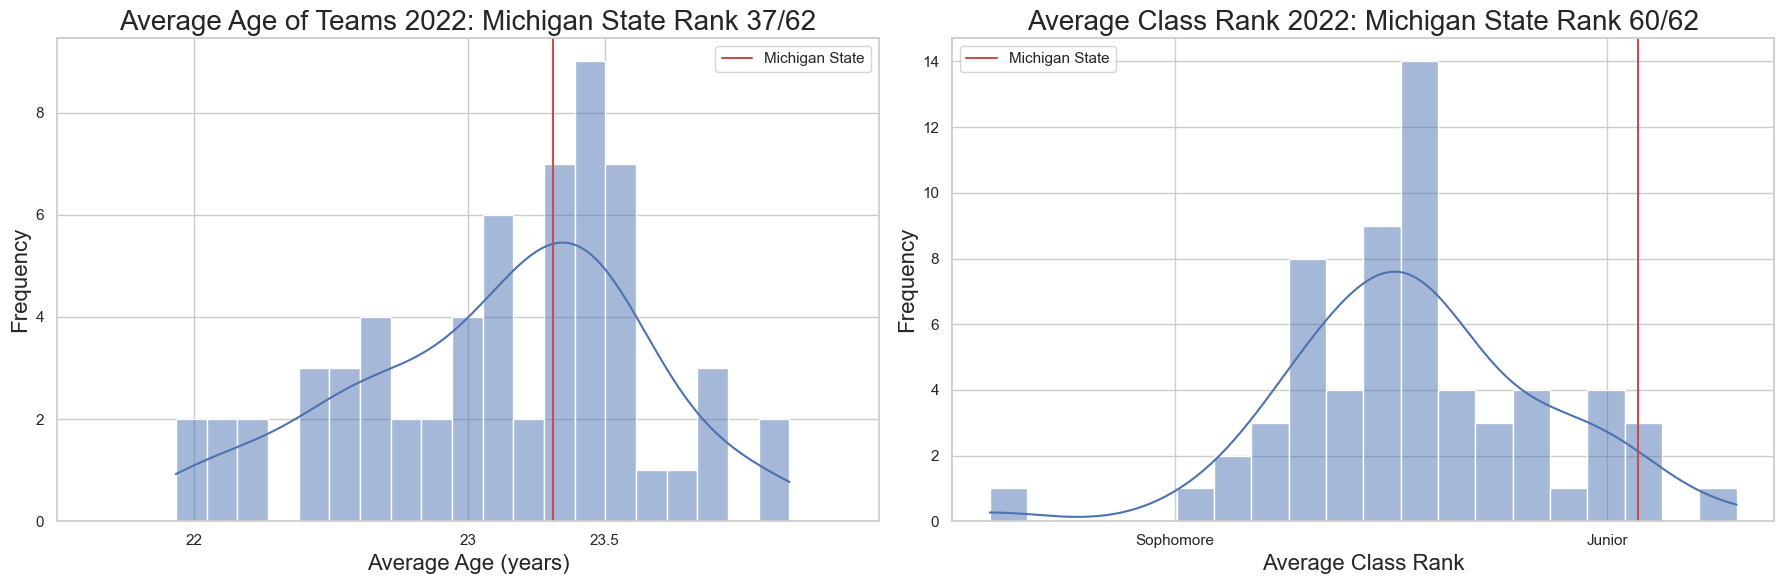

In [41]:
# Let's create visualizations to show where Michigan State sits within the dataset in terms of average age and class rank.

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for Average Age
sns.histplot(grouped_by_team['Age'], kde=True, bins=20, ax=axes[0])
axes[0].axvline(michigan_state_age_rank, color='r', linestyle='-', label='Michigan State')
axes[0].set_title(f'Average Age of Teams {year}: Michigan State Rank {michigan_state_age_rank_position}/{total_teams}')
# Set font size for title
axes[0].title.set_size(20)

axes[0].set_xlabel('Average Age (years)')
axes[0].set_ylabel('Frequency')
# Set font size for x and y labels
axes[0].xaxis.label.set_size(16)
axes[0].yaxis.label.set_size(16)

# Convert x-tick labels into whole years and quarters of a year
axes[0].set_xticks([20.5*365, 21*365, 22*365, 23*365, 23.5*365])
axes[0].set_xticklabels(['20.5', '21', '22', '23', '23.5'])
# Set the range of the x-axis based on range of data
axes[0].set_xlim([21.5*365, 24.5*365])

axes[0].legend()



# Plot for Class Rank
sns.histplot(grouped_by_team['Class_Rank'], kde=True, bins=20, ax=axes[1])
axes[1].axvline(michigan_state_class_rank, color='r', linestyle='-', label='Michigan State')
axes[1].set_title(f'Average Class Rank {year}: Michigan State Rank {michigan_state_class_rank_position}/{total_teams}')
# Set font size for title
axes[1].title.set_size(20)

axes[1].set_xlabel('Average Class Rank')
axes[1].set_ylabel('Frequency')
# Set font size for x and y labels
axes[1].xaxis.label.set_size(16)
axes[1].yaxis.label.set_size(16)
axes[1].legend()

# Change the tick marks on the x-axis to strings, 2.0 = Sophomore, etc.
axes[1].set_xticks([2, 3])
axes[1].set_xticklabels(['Sophomore', 'Junior'])
plt.tight_layout()
plt.show()


## Filter to just defenseman an just D and Goalies

In [42]:
## Dataframe of just defensemen
# Assuming 'Position' is the column that holds the player's position
df_defense_goalies = df[df['Position'].isin(['Defensemen', 'Goaltenders'])]
df_defense = df[df['Position'] == 'Defensemen']

# For Defensemen and Goalies
grouped_by_team_def_goal = df_defense_goalies.groupby('School').agg({
    'Age': 'mean',
    'Class_Rank': 'mean'
}).reset_index()

# For just Defensemen
grouped_by_team_def = df_defense.groupby('School').agg({
    'Age': 'mean',
    'Class_Rank': 'mean'
}).reset_index()

# conver the Age column in both dataframes to years with 2 decimal places
grouped_by_team_def_goal['Age'] = grouped_by_team_def_goal['Age'] / 365
grouped_by_team_def_goal['Age'] = grouped_by_team_def_goal['Age'].round(2)

grouped_by_team_def['Age'] = grouped_by_team_def['Age'] / 365
grouped_by_team_def['Age'] = grouped_by_team_def['Age'].round(2)

# Sort these new grouped DataFrames
# For example, for Defensemen and Goalies
youngest_by_age_def_goal = grouped_by_team_def_goal.sort_values('Age').iloc[0]
oldest_by_age_def_goal = grouped_by_team_def_goal.sort_values('Age', ascending=False).iloc[0]

youngest_by_class_rank_def_goal = grouped_by_team_def_goal.sort_values('Class_Rank').iloc[0]
oldest_by_class_rank_def_goal = grouped_by_team_def_goal.sort_values('Class_Rank', ascending=False).iloc[0]


# Calculate michigan state's rank among all teams for Defensemen and Goalies


# For Defensemen and Goalies
print("Defensemen and Goalies:")
print("Youngest by age:", youngest_by_age_def_goal)
print("Oldest by age:", oldest_by_age_def_goal)
print("Youngest by class rank:", youngest_by_class_rank_def_goal)
print("Oldest by class rank:", oldest_by_class_rank_def_goal)




Defensemen and Goalies:
Youngest by age: School         Harvard
Age              21.92
Class_Rank    2.538462
Name: 21, dtype: object
Oldest by age: School        Canisius
Age              24.48
Class_Rank         3.5
Name: 12, dtype: object
Youngest by class rank: School        Stonehill
Age               22.54
Class_Rank          1.9
Name: 56, dtype: object
Oldest by class rank: School        Canisius
Age              24.48
Class_Rank         3.5
Name: 12, dtype: object


In [43]:
##################################
# Calculate Michigan State Rank in dataframe with goalies and defensemen


michigan_state_def_goal_age_rank = grouped_by_team_def_goal[grouped_by_team_def_goal['School'] == 'Michigan-State']['Age'].values[0]
michigan_state_def_goal_class_rank = grouped_by_team_def_goal[grouped_by_team_def_goal['School'] == 'Michigan-State']['Class_Rank'].values[0]

# # Find rank among all teams
age_rank = grouped_by_team_def_goal.sort_values('Age').reset_index(drop=True).reset_index()
class_rank = grouped_by_team_def_goal.sort_values('Class_Rank').reset_index(drop=True).reset_index()

michigan_state_def_goal_age_rank_position = age_rank[age_rank['School'] == 'Michigan-State']['index'].values[0] + 1
michigan_state_def_goal_class_rank_position = class_rank[class_rank['School'] == 'Michigan-State']['index'].values[0] + 1

# Total number of teams for context
total_teams = len(grouped_by_team)

michigan_state_def_goal_age_rank, michigan_state_def_goal_class_rank, michigan_state_def_goal_age_rank_position, michigan_state_def_goal_class_rank_position, total_teams


(23.18, 3.25, 33, 59, 62)

In [44]:
###############
# Do the same for just Defensemen

michigan_state_def_age_rank = grouped_by_team_def[grouped_by_team_def['School'] == 'Michigan-State']['Age'].values[0]
michigan_state_def_class_rank = grouped_by_team_def[grouped_by_team_def['School'] == 'Michigan-State']['Class_Rank'].values[0]

# # Find rank among all teams
age_rank = grouped_by_team_def.sort_values('Age').reset_index(drop=True).reset_index()
class_rank = grouped_by_team_def.sort_values('Class_Rank').reset_index(drop=True).reset_index()

michigan_state_def_age_rank_position = age_rank[age_rank['School'] == 'Michigan-State']['index'].values[0] + 1
michigan_state_def_class_rank_position = class_rank[class_rank['School'] == 'Michigan-State']['index'].values[0] + 1

# Total number of teams for context
total_teams = len(grouped_by_team)

michigan_state_def_age_rank, michigan_state_def_class_rank, michigan_state_def_age_rank_position, michigan_state_def_class_rank_position, total_teams


(22.97, 3.111111111111111, 26, 57, 62)

In [45]:
# Function to create the plots
def create_plots(df, title_suffix, michigan_state_age_rank, michigan_state_age_rank_position, michigan_state_class_rank, michigan_state_class_rank_position):
    sns.set(style="whitegrid")

    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    sns.histplot(df['Age'], kde=True, bins=20, ax=axes[0])
    axes[0].axvline(michigan_state_age_rank, color='r', linestyle='-', label='Michigan State')
    axes[0].set_title(f'Average Age of {title_suffix}: {year} Michigan State Rank {michigan_state_age_rank_position}/{len(df)}')
    axes[0].title.set_size(20)
    axes[0].set_xlabel('Average Age (years)')
    axes[0].xaxis.label.set_size(16)
    axes[0].set_ylabel('Frequency')
    axes[0].yaxis.label.set_size(16)
    axes[0].legend()
    axes[0].set_xticks([20.5, 21, 22, 23, 23.5, 24])
    ################### Set the range of the x-axis based on range of data
    axes[0].set_xlim([21.5, 24])


    sns.histplot(df['Class_Rank'], kde=True, bins=20, ax=axes[1])
    axes[1].axvline(michigan_state_class_rank, color='r', linestyle='-', label='Michigan State')
    axes[1].set_title(f'Class Rank of {title_suffix}: {year} Michigan State Rank {michigan_state_class_rank_position}/{len(df)}')
    axes[1].title.set_size(20)
    axes[1].set_xlabel('Average Class Rank')
    axes[1].xaxis.label.set_size(16)
    axes[1].set_ylabel('Frequency')
    axes[1].yaxis.label.set_size(16)
    axes[1].legend()
    axes[1].set_xticks([2, 3])
    axes[1].set_xticklabels(['Sophomore', 'Junior'])

    plt.tight_layout()
    plt.show()


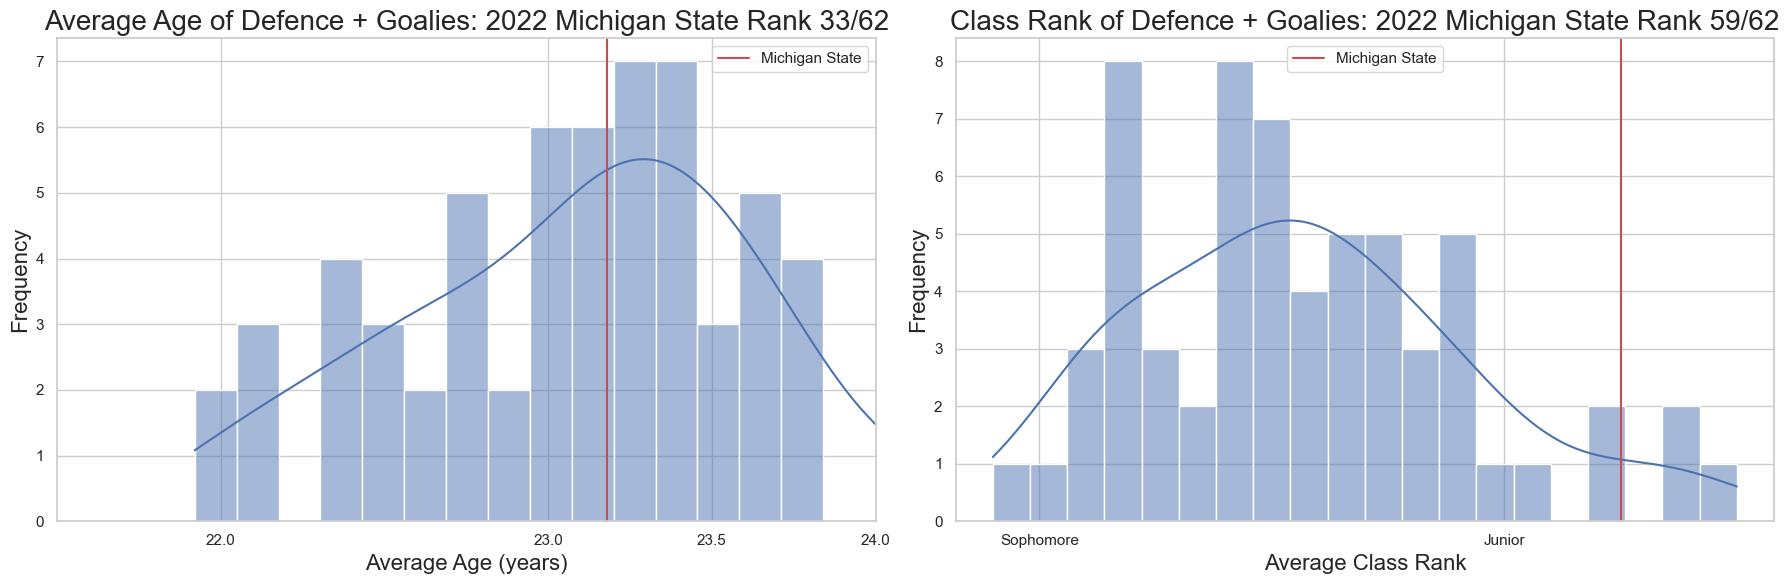

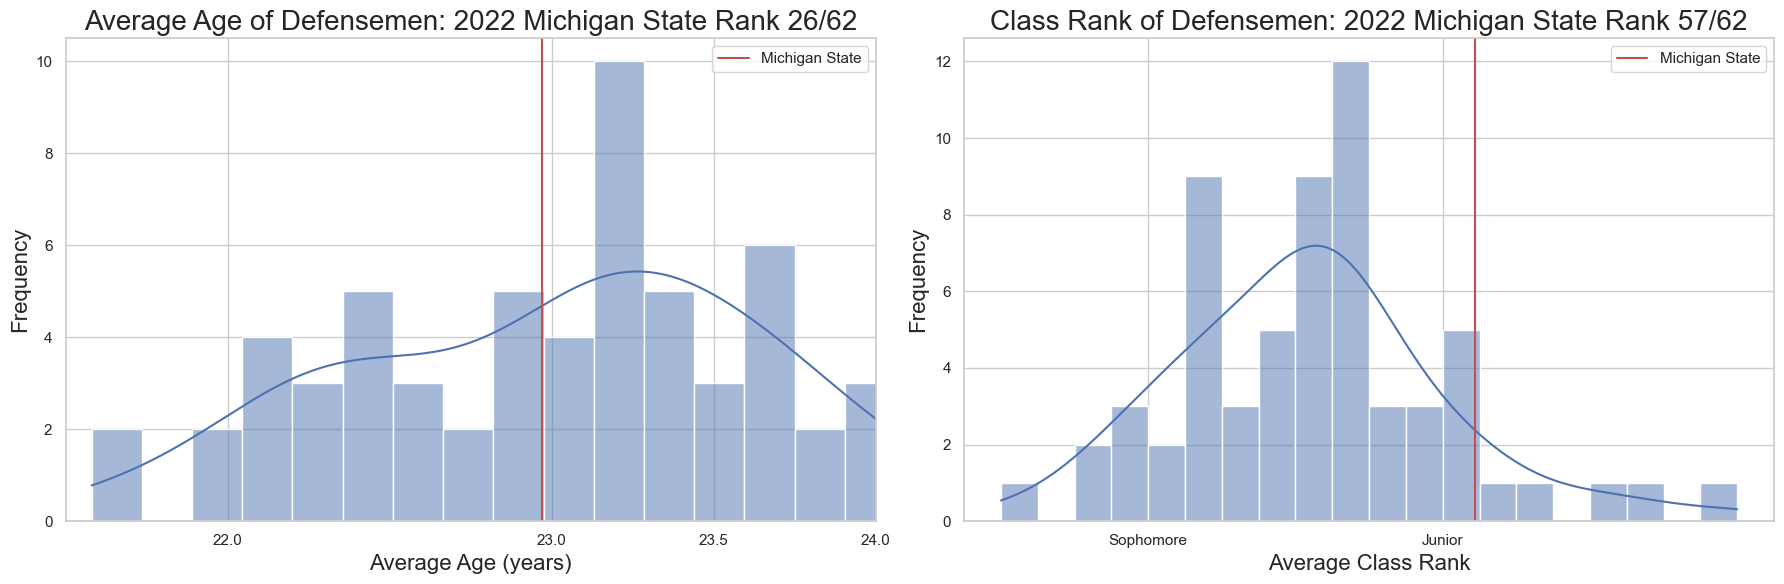

In [46]:
# Create plots for Defensemen and Goalies
create_plots(
    grouped_by_team_def_goal, 
    'Defence + Goalies', 
    michigan_state_def_goal_age_rank, 
    michigan_state_def_goal_age_rank_position, 
    michigan_state_def_goal_class_rank, 
    michigan_state_def_goal_class_rank_position
)

# Create plots for just Defensemen
create_plots(
    grouped_by_team_def, 
    'Defensemen', 
    michigan_state_def_age_rank, 
    michigan_state_def_age_rank_position, 
    michigan_state_def_class_rank, 
    michigan_state_def_class_rank_position
)


## All B1G Teams

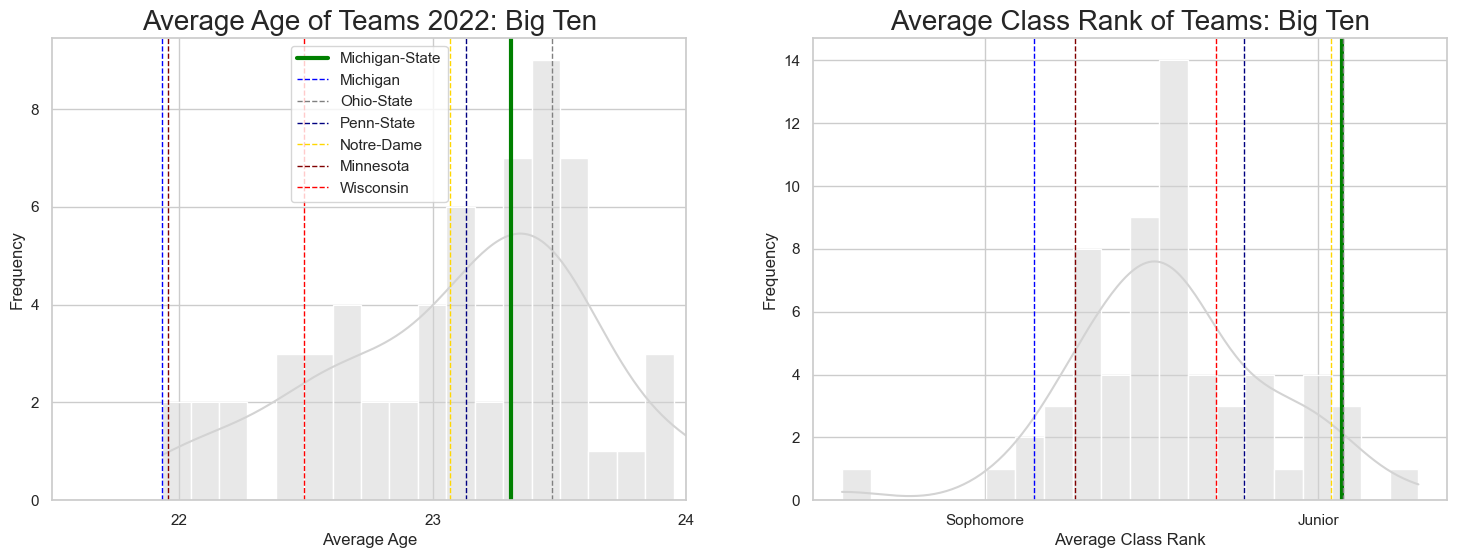

In [49]:
# List of Big Ten Conference members including Michigan State for this analysis
big_ten_teams = ['Michigan-State', 'Michigan', 'Ohio-State', 'Penn-State', 'Notre-Dame', 'Minnesota', 'Wisconsin']

# Filter the grouped_by_team DataFrame to only include Big Ten teams
big_ten_data = grouped_by_team[grouped_by_team['School'].isin(big_ten_teams)].sort_values('Age').reset_index(drop=True)


# Create a color mapping for Big Ten teams to highlight them in the plots.
color_mapping = {
    'Michigan-State': 'green',
    'Michigan': 'blue',
    'Ohio-State': 'grey',
    'Penn-State': 'navy',
    'Notre-Dame': 'gold',
    'Minnesota': 'maroon',
    'Wisconsin': 'red'
}

# Create subplots for visual comparison with the entire dataset
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for Average Age
sns.histplot(grouped_by_team['Age'], kde=True, bins=20, ax=axes[0], color='lightgrey')
for team in big_ten_teams:
    linestyle = '-' if team == 'Michigan-State' else '--'  # Solid for Michigan State, dashed for others
    linewidth = 3 if team == 'Michigan-State' else 1  # 3 is bolder, 1 is the default width
    axes[0].axvline(grouped_by_team[grouped_by_team['School'] == team]['Age'].values[0], 
                    color=color_mapping[team], linestyle=linestyle, linewidth=linewidth, label=team)
axes[0].set_title(f'Average Age of Teams {year}: Big Ten')
axes[0].title.set_size(20)
axes[0].set_xlabel('Average Age')
axes[0].set_ylabel('Frequency')

# Convert x-tick labels into whole years and quarters of a year
axes[0].set_xticks([20.5*365, 21*365, 22*365, 23*365, 24*365])
axes[0].set_xticklabels(['20.5', '21', '22', '23', '24'])
# Set the range of the x-axis based on range of data
axes[0].set_xlim([21.5*365, 24*365])
axes[0].legend()

# Plot for Class Rank
sns.histplot(grouped_by_team['Class_Rank'], kde=True, bins=20, ax=axes[1], color='lightgrey')
for team in big_ten_teams:
    linestyle = '-' if team == 'Michigan-State' else '--'  # Solid for Michigan State, dashed for others
    linewidth = 3 if team == 'Michigan-State' else 1  # 3 is bolder, 1 is the default width
    axes[1].axvline(grouped_by_team[grouped_by_team['School'] == team]['Class_Rank'].values[0], 
                    color=color_mapping[team], linestyle=linestyle, linewidth=linewidth, label=team)
axes[1].set_title(f'Average Class Rank of Teams: Big Ten')
axes[1].title.set_size(20)
axes[1].set_xlabel('Average Class Rank')
axes[1].set_ylabel('Frequency')


axes[1].set_xticks([2, 3])
axes[1].set_xticklabels(['Sophomore', 'Junior'])
# axes[1].legend()

# plt.tight_layout()
plt.show()


## Dictionary of Conference members

2023-24 Season

In [ ]:
# Store a dictionary of conferences and their members
conf_dict = {
    'Atlantic Hockey': ['Air Force', "American Int'l", 'Army', 'Bentley', 'Canisius', 'Holy Cross', 'Mercyhurst', 'Niagara', 'RIT', 'Robert Morris', 'Sacred Heart'],
    'Big Ten': ['Michigan', 'Michigan State', 'Minnesota', 'Notre Dame', 'Ohio State', 'Penn State', 'Wisconsin'],
    'CCHA': ['Augustana', 'Bemidji State', 'Bowling Green', 'Ferris State', 'Lake Superior', 'Michigan Tech', 'Minnesota State', 'Northern Michigan', 'St. Thomas'],
    'ECAC': ['Brown', 'Clarkson', 'Colgate', 'Cornell', 'Dartmouth', 'Harvard', 'Princeton', 'Quinnipiac', 'Rensselaer', 'St. Lawrence', 'Union', 'Yale'],
    'Hockey East': ['Boston College', 'Boston University', 'Connecticut', 'Maine', 'Mass.-Lowell', 'Massachusetts', 'Merrimack', 'New Hampshire', 'Northeastern', 'Providence', 'Vermont'],
    'NCHC': ['Colorado College', 'Denver', 'Miami', 'Minnesota-Duluth', 'Omaha', 'North Dakota', 'St. Cloud State', 'Western Michigan'],
    'Independents': ['Alaska-Anchorage', 'Alaska', 'Arizona State', 'Lindenwood', 'Long Island', 'Stonehill']
}

conference_color_mapping = {
 
    'Atlantic Hockey': 'purple',
    'Big Ten': 'blue',
    'CCHA': 'green',
    'ECAC': 'red',
    'Hockey East': 'orange',
    'NCHC': 'brown',
    'Independents': 'grey'
}

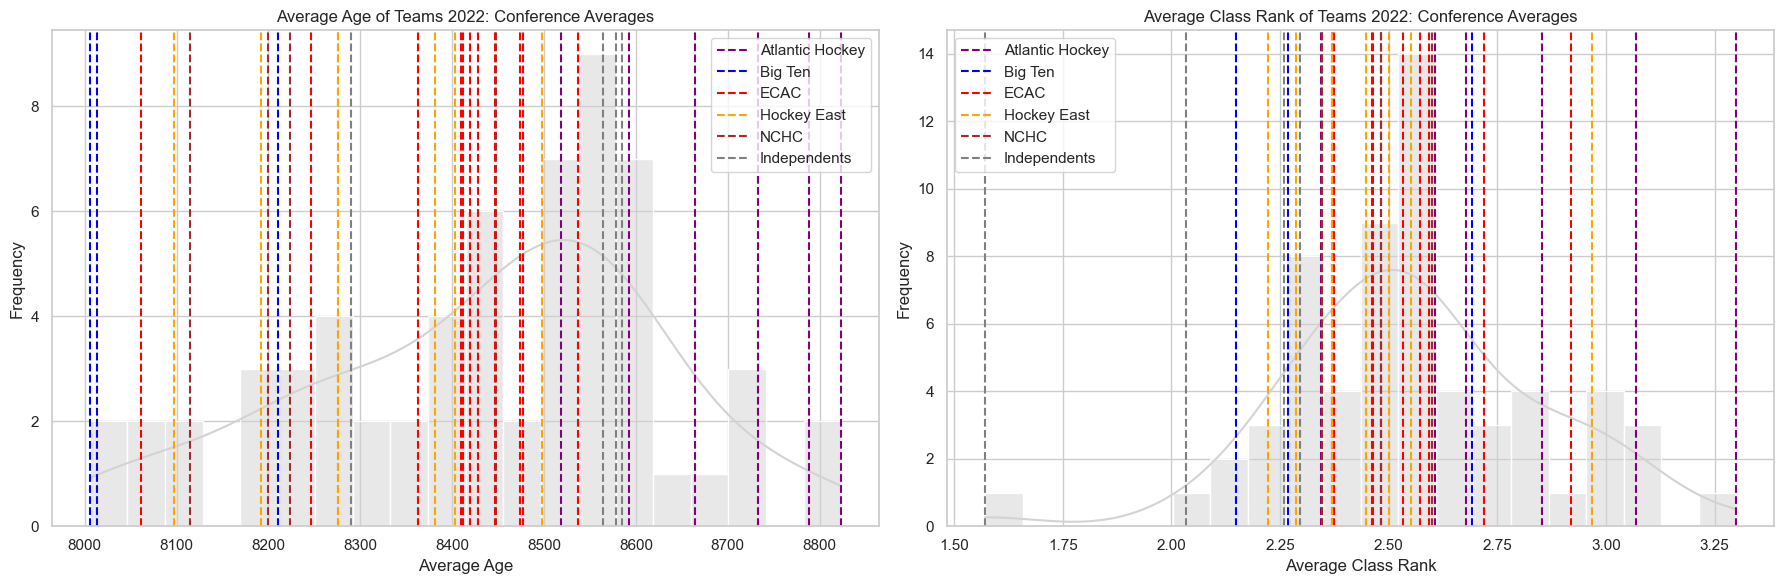

In [ ]:
# Filter the data to include only the teams belonging to the conferences in our dictionary
conference_teams = []
for conf, teams in conf_dict.items():
    conference_teams.extend(teams)

conference_data = grouped_by_team[grouped_by_team['School'].isin(conference_teams)].reset_index(drop=True)


# Create subplots for visual comparison with the entire dataset
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for Average Age
sns.histplot(grouped_by_team['Age'], kde=True, bins=20, ax=axes[0], color='lightgrey')
for conference, teams in conf_dict.items():
    for team in teams:
        if team in conference_data['School'].values:
            axes[0].axvline(conference_data[conference_data['School'] == team]['Age'].values[0], 
                            color=conference_color_mapping.get(conference, 'grey'), linestyle='--', label=conference)
            
# Remove duplicate labels in the legend
handles, labels = axes[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axes[0].legend(by_label.values(), by_label.keys())

axes[0].set_title(f'Average Age of Teams {year}: Conference Averages')
axes[0].set_xlabel('Average Age')
axes[0].set_ylabel('Frequency')

# Plot for Class Rank
sns.histplot(grouped_by_team['Class_Rank'], kde=True, bins=20, ax=axes[1], color='lightgrey')
for conference, teams in conf_dict.items():
    for team in teams:
        if team in conference_data['School'].values:
            axes[1].axvline(conference_data[conference_data['School'] == team]['Class_Rank'].values[0], 
                            color=conference_color_mapping.get(conference, 'grey'), linestyle='--', label=conference)
            
# Remove duplicate labels in the legend
handles, labels = axes[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axes[1].legend(by_label.values(), by_label.keys())

axes[1].set_title(f'Average Class Rank of Teams {year}: Conference Averages')
axes[1].set_xlabel('Average Class Rank')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
